<a href="https://colab.research.google.com/github/SrikanthDodle/MNIST-digits-classification/blob/main/MNIST_Digit_classification_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement: MNIST Digit Classification using Convolutional Neural Networks


The MNIST dataset is a collection of 28x28 pixel grayscale images of handwritten digits (0 to 9). Each image is labeled with the corresponding digit it represents. This dataset has been a benchmark for evaluating the performance of machine learning models, especially in the field of image classification.

**Objective:**

Develop a deep learning model capable of accurately classifying handwritten digits from the MNIST dataset. The primary goal is to leverage convolutional neural networks (CNNs) to achieve high accuracy in recognizing and categorizing the digits.

In [2]:
#Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image #Pillow library
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Load MNIST dataset from Keras

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
#type check
type(x_train)

numpy.ndarray

In [7]:
# shape of the numpy arrays
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


x_train: NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

y_train: NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

x_test: NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test: NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [8]:
#print numpy array of a image
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

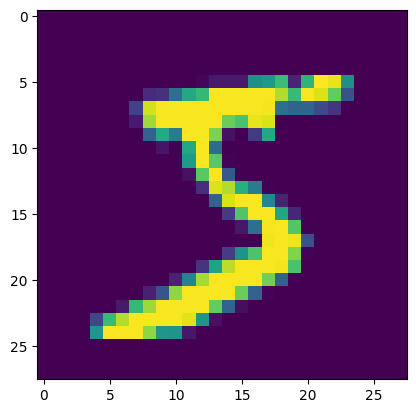

5


In [9]:
#display an image and its label
plt.imshow(x_train[0])
plt.show()

#label for 0th images in x_train
print(y_train[0])

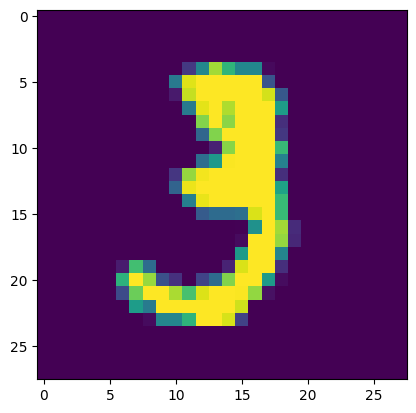

3


In [11]:
#display an image and its label
plt.imshow(x_train[10])
plt.show()

#label for 0th images in x_train
print(y_train[10])

In [13]:
# unique values in Y_train
print(np.unique(y_train))

# unique values in Y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension




*Standardization / Scaling *

In [14]:
x_train = x_train/255
x_test = x_test/255

By this all the values will be in the range 0 to 1

## Build Neural Network

In [15]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [16]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# training the Neural Network

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2945 - accuracy: 0.9146
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1417 - accuracy: 0.9573
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1077 - accuracy: 0.9673
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0873 - accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0722 - accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0622 - accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0541 - accuracy: 0.9830
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0464 - accuracy: 0.9851
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0413 - accuracy: 0.9862
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.037

Training data accuracy = 98.7%

Accuracy on Test data:

In [18]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.1073 - accuracy: 0.9714
0.9714000225067139


Test data accuracy = 97.1%

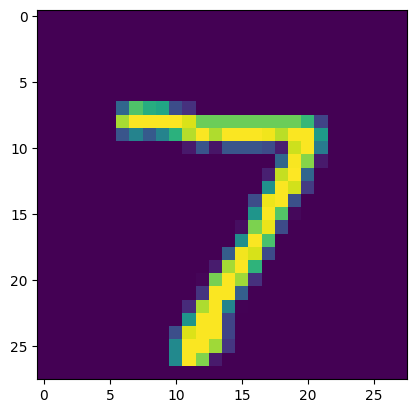

7


In [20]:
# first data point in x_test
plt.imshow(x_test[0])
plt.show()

#it's Label
print(y_test[0])

In [21]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [22]:
print(y_pred.shape)

(10000, 10)


In [23]:
print(y_pred[0])

[5.2336718e-10 2.1411291e-10 4.4575012e-07 2.0592995e-05 1.6775721e-13
 1.7600972e-09 2.6423318e-15 9.9997824e-01 2.3204963e-07 4.0510179e-07]


model.predict() gives the prediction probability of each class for that data point

In [24]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [25]:
# converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 5, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test --> True labels

y_pred_labels --> Predicted Labels

# Confusion Matrix

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred_labels)

In [27]:
print(conf_matrix)

tf.Tensor(
[[ 965    0    3    1    1    4    4    1    1    0]
 [   0 1120    2    2    0    1    2    0    8    0]
 [   3    3 1007    7    3    0    2    5    1    1]
 [   1    0    3  980    0   17    0    4    3    2]
 [   1    0    4    0  962    2    6    1    2    4]
 [   3    0    0   11    1  872    4    0    1    0]
 [   1    1    1    0    6   17  931    0    1    0]
 [   0    8   12    0    0    1    0  993    3   11]
 [   4    0    2   10    6   16    2    6  925    3]
 [   3    3    0    5   17   10    2    5    5  959]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

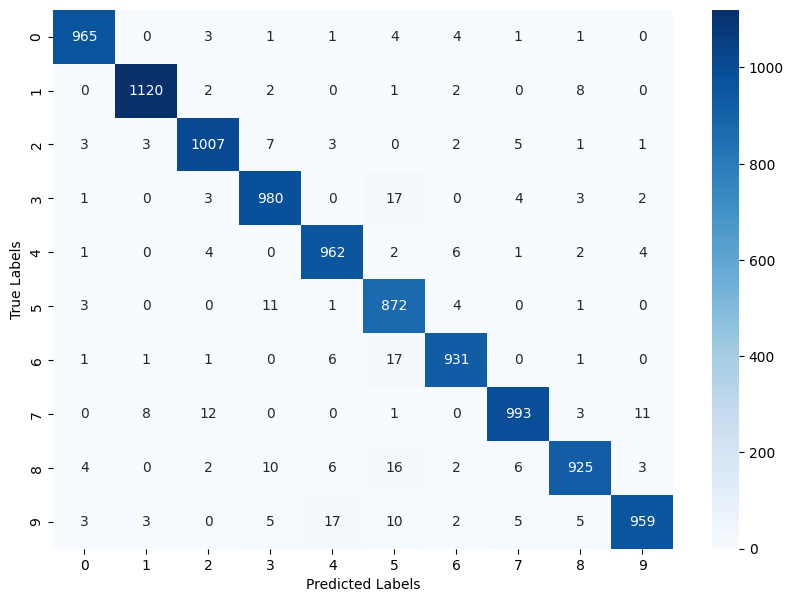

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues') #fmt = d means integers values
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

## Predictive System

Path of the image to be predicted: /content/mnist image.png


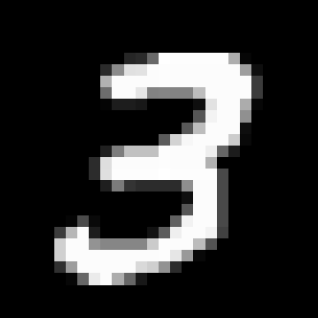

1/1 [==============================] - 0s 20ms/step
The Handwritten Digit is recognised as  3


In [31]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)